## Observations and Insights

## Dependencies and starter code

In [139]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets
%matplotlib notebook
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merge_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')
merge_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [140]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen = merge_data.groupby(["Drug Regimen"])
avg = regimen["Tumor Volume (mm3)"].mean()
med = regimen["Tumor Volume (mm3)"].median()
var = regimen["Tumor Volume (mm3)"].var()
std = regimen["Tumor Volume (mm3)"].std()
sem = regimen["Tumor Volume (mm3)"].sem()

summary = pd.DataFrame({"Mean": avg, "Median":med, "Variance":var, "Standard Deviation": std, "SEM": sem})
summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [151]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
regimenData = merge_data.groupby(['Drug Regimen'])['Mouse ID'].count()
print(regimenData)

regimenData.plot(kind="bar", title = "Regimen Data")

plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

plt.show()

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64


In [152]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(regimenData))

plt.bar(x_axis, regimenData, color='b', alpha=0.75, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(regimenData)+10)

plt.title("Data Points Visual")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

Text(11.249996688630848, 0.5, 'Data Points')

## Pie plots

In [153]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = merge_data.groupby(['Sex'])['Mouse ID'].count()
print(gender)
gender.plot(kind="pie", title = "Gender Distribution")



Sex
Female    935
Male      958
Name: Mouse ID, dtype: int64


<IPython.core.display.Javascript object>


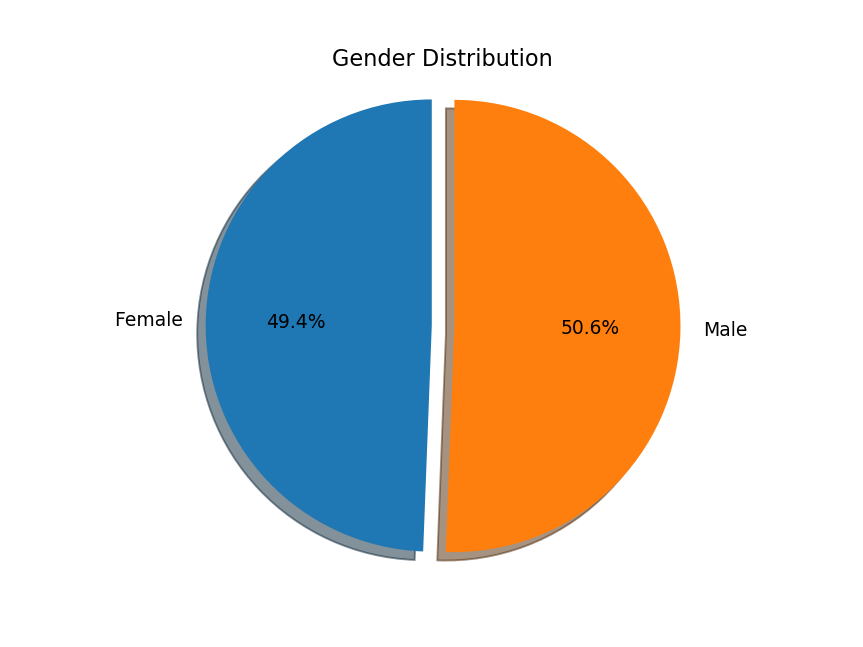

In [154]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = 'Female', 'Male'
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(gender, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.set_title('Gender Distribution')
ax1.axis('equal')  

plt.show()

## Quartiles, outliers and boxplots

In [155]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

regimens = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
tumor_volume = merge_data.loc[merge_data['Drug Regimen'].isin(regimens)]
capomulin = tumor_volume.loc[tumor_volume['Drug Regimen']=='Capomulin']
ramicane = tumor_volume.loc[tumor_volume['Drug Regimen']=='Ramicane']
infubinol = tumor_volume.loc[tumor_volume['Drug Regimen']=='Infubinol']
ceftamin = tumor_volume.loc[tumor_volume['Drug Regimen']=='Ceftamin']

def quantileData(df, name):
    quantiles = df.quantile([.25, .5, .75])
    lowerq = quantiles[0.25]
    upperq = quantiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    print(f'Quartiles data for {name}')
    print(f'lower quartile {lowerq:.2f}')
    print(f'upper quartile {upperq:.2f}')
    print(f'IQR {iqr:.2f}')
    print(f'Lower bound {lower_bound:.2f}')
    print(f'Upper bound {upper_bound:.2f}')
    print(f'------------------------------')

quantileData(capomulin['Tumor Volume (mm3)'], 'Capomulin')
quantileData(ramicane['Tumor Volume (mm3)'], 'Ramicane')
quantileData(infubinol['Tumor Volume (mm3)'], 'Infubinol')
quantileData(ceftamin['Tumor Volume (mm3)'], 'Ceftamin')

Quartiles data for Capomulin
lower quartile 37.69
upper quartile 45.00
IQR 7.31
Lower bound 26.71
Upper bound 55.97
------------------------------
Quartiles data for Ramicane
lower quartile 36.67
upper quartile 45.00
IQR 8.33
Lower bound 24.19
Upper bound 57.49
------------------------------
Quartiles data for Infubinol
lower quartile 47.31
upper quartile 57.31
IQR 10.00
Lower bound 32.31
Upper bound 72.32
------------------------------
Quartiles data for Ceftamin
lower quartile 47.21
upper quartile 56.80
IQR 9.59
Lower bound 32.82
Upper bound 71.19
------------------------------


In [147]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
regement = merge_data[merge_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
regement = regement.sort_values(["Timepoint"], ascending=True)
regement

regementData = regement[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]


regementSort = regementData.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
regement_df = regementSort.to_frame()
regement_df
top_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

final_df = regement_df.reset_index()
tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(top_4)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=top_4)
plt.ylim(10, 80)
plt.show()

## Line and scatter plots

     level_0  index Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  \
0          0     10     s185    Capomulin  Female           3          17   
1          1     11     s185    Capomulin  Female           3          17   
2          2     12     s185    Capomulin  Female           3          17   
3          3     13     s185    Capomulin  Female           3          17   
4          4     14     s185    Capomulin  Female           3          17   
..       ...    ...      ...          ...     ...         ...         ...   
225      225    440     i557    Capomulin  Female           1          24   
226      226   1452     r157    Capomulin    Male          22          25   
227      227   1453     r157    Capomulin    Male          22          25   
228      228   1454     r157    Capomulin    Male          22          25   
229      229   1455     r157    Capomulin    Male          22          25   

     Timepoint  Tumor Volume (mm3)  Metastatic Sites  
0            0      

<IPython.core.display.Javascript object>


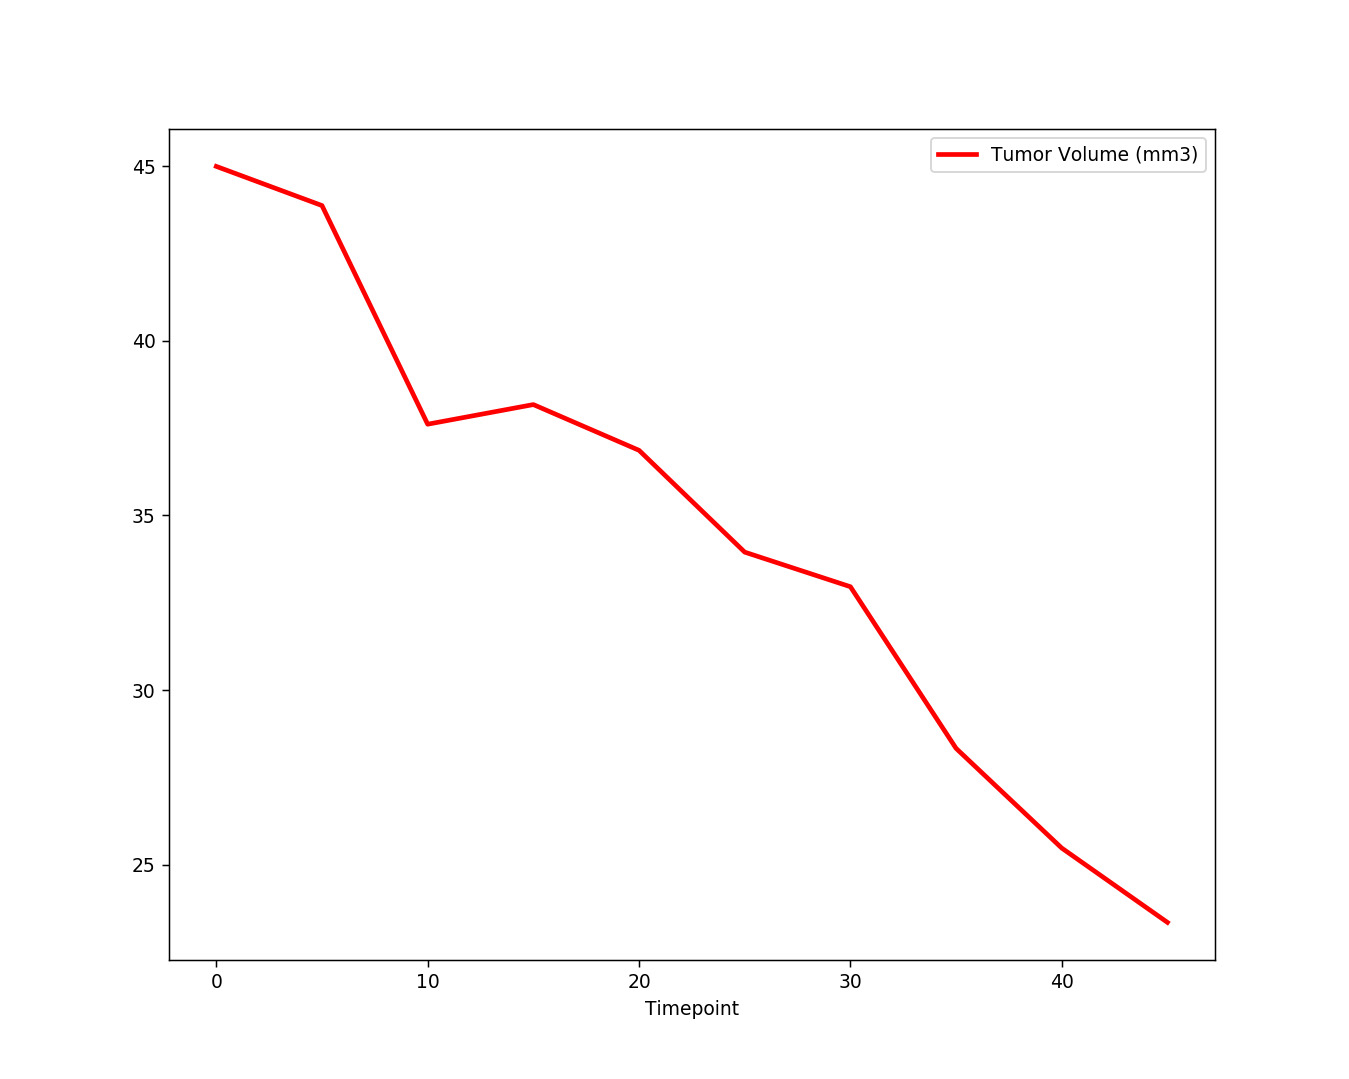

In [148]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin = merge_data.loc[merge_data["Drug Regimen"] == "Capomulin"]
capomulin = capomulin_df.reset_index()
print(capomulin)
cap_single_df = capomulin.loc[capomulin_df["Mouse ID"] == "s185"]
cap_single_df
cap_single_df = cap_single_df.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
#capomulin_df.index
#Reset the index
cap_single_df = cap_single_df.reset_index(drop=True)
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_single_df.set_index('Timepoint').plot(figsize=(10, 8), linewidth=2.5, color='red')

<IPython.core.display.Javascript object>


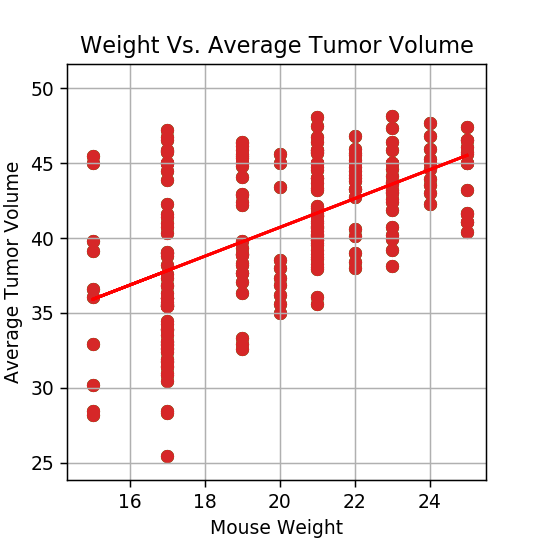

In [159]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weight = capomulin.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
weight.head()
weight.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(4,4),
              title="Weight Vs. Average Tumor Volume")
plt.show()

In [163]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = capomulin.iloc[:,0]
avg_tumor_volume = capomulin.iloc[:,1]
correlation = st.pearsonr(mouse_weight, avg_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

x_values = capomulin['Weight (g)']
y_values = capomulin['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()

The correlation between both factors is nan


C:\Users\212760357\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\scipy\stats\stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
